<h2><font color="#004D7F" size=6>Módulo 4. Machine Learning</font></h2>



<h1><font color="#004D7F" size=5> Arboles de Decisión</font></h1>

<br><br>
<div style="text-align: right">
<font color="#004D7F" size=3>Luisa López Vázquez</font><br>
<font color="#004D7F" size=3>Diplomado en Ciencia de Datos</font><br>

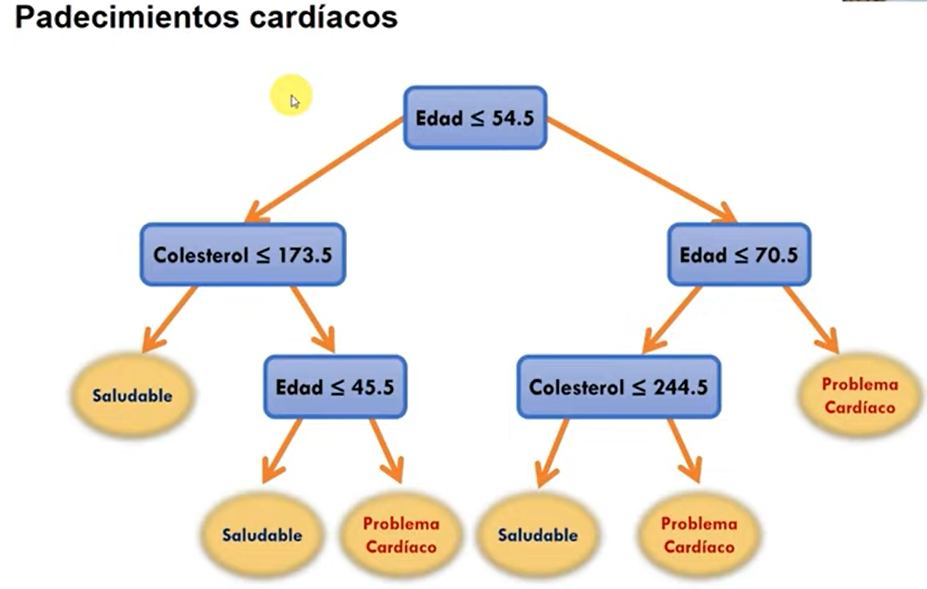

<BR><BR>

# Gráfica dispersión: Edad y Colesterol

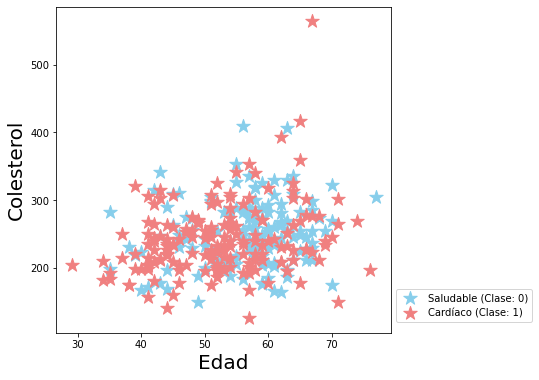

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

pacientes = pd.read_csv("pacientes.csv")

saludables = pacientes[pacientes["problema_cardiaco"]==0]
cardiacos = pacientes[pacientes["problema_cardiaco"]==1]

plt.figure(figsize=(6, 6))
plt.xlabel('Edad', fontsize = 20.0)
plt.ylabel('Colesterol', fontsize = 20.0)
plt.scatter(saludables["edad"], saludables["colesterol"], 
            label="Saludable (Clase: 0)", marker="*", c="skyblue", s=200)
plt.scatter(cardiacos["edad"], cardiacos["colesterol"],
            label="Cardíaco (Clase: 1)", marker="*", c="lightcoral", s=200)
plt.legend(bbox_to_anchor=(1, 0.15))
plt.show()


<BR><BR><BR><BR><BR><BR><BR><BR><BR><BR><BR><BR><BR><BR><BR><BR><BR><BR><BR><BR><BR><BR><BR><BR><BR>

# Entropía:
#### Promedio de información almacenada en una variable aleatoria

In [2]:
from scipy.stats import entropy
from math import log

edades = pd.Series([40, 30, 20, 50])
colesterol = pd.Series([100, 110, 100, 110])

print(edades.value_counts()/edades.size)
print(colesterol.value_counts()/colesterol.size)
print(entropy(edades.value_counts()/edades.size, base=2))
print(entropy(colesterol.value_counts()/colesterol.size, base=2))


40    0.25
30    0.25
20    0.25
50    0.25
dtype: float64
100    0.5
110    0.5
dtype: float64
2.0
1.0


<BR><BR>

# Datos de Entrenamiento y Prueba

In [3]:
from sklearn.model_selection import train_test_split

datos_entrena, datos_prueba, clase_entrena, clase_prueba = train_test_split(
    pacientes[["edad", "colesterol"]],
    pacientes["problema_cardiaco"], 
    test_size=0.30)


<BR><BR>

# Creación del Árbol de Decisión

0.4888888888888889
|--- Edad <= 54.50
|   |--- Colesterol <= 273.50
|   |   |--- Colesterol <= 266.50
|   |   |   |--- Colesterol <= 262.50
|   |   |   |   |--- Colesterol <= 249.50
|   |   |   |   |   |--- Colesterol <= 248.00
|   |   |   |   |   |   |--- Edad <= 47.50
|   |   |   |   |   |   |   |--- Edad <= 44.50
|   |   |   |   |   |   |   |   |--- Colesterol <= 176.00
|   |   |   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |   |   |--- Colesterol >  176.00
|   |   |   |   |   |   |   |   |   |--- Colesterol <= 198.50
|   |   |   |   |   |   |   |   |   |   |--- Edad <= 42.50
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 2
|   |   |   |   |   |   |   |   |   |   |--- Edad >  42.50
|   |   |   |   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |   |   |   |--- Colesterol >  198.50
|   |   |   |   |   |   |   |   |   |   |--- Colesterol <= 217.00
|   |   |   |   |   |   |   |   |   |   |   |--- class: 1
|   |   |   |  

[Text(0.5780669144981413, 0.96875, 'Edad <= 54.5\nentropy = 0.971\nsamples = 210\nvalue = [84, 126]'),
 Text(0.31226765799256506, 0.90625, 'Colesterol <= 273.5\nentropy = 0.826\nsamples = 108\nvalue = [28, 80]'),
 Text(0.241635687732342, 0.84375, 'Colesterol <= 266.5\nentropy = 0.731\nsamples = 88\nvalue = [18, 70]'),
 Text(0.22676579925650558, 0.78125, 'Colesterol <= 262.5\nentropy = 0.754\nsamples = 83\nvalue = [18, 65]'),
 Text(0.1970260223048327, 0.71875, 'Colesterol <= 249.5\nentropy = 0.727\nsamples = 79\nvalue = [16, 63]'),
 Text(0.1821561338289963, 0.65625, 'Colesterol <= 248.0\nentropy = 0.776\nsamples = 70\nvalue = [16, 54]'),
 Text(0.16728624535315986, 0.59375, 'Edad <= 47.5\nentropy = 0.755\nsamples = 69\nvalue = [15, 54]'),
 Text(0.07434944237918216, 0.53125, 'Edad <= 44.5\nentropy = 0.65\nsamples = 36\nvalue = [6, 30]'),
 Text(0.05947955390334572, 0.46875, 'Colesterol <= 176.0\nentropy = 0.722\nsamples = 30\nvalue = [6, 24]'),
 Text(0.04460966542750929, 0.40625, 'entropy 

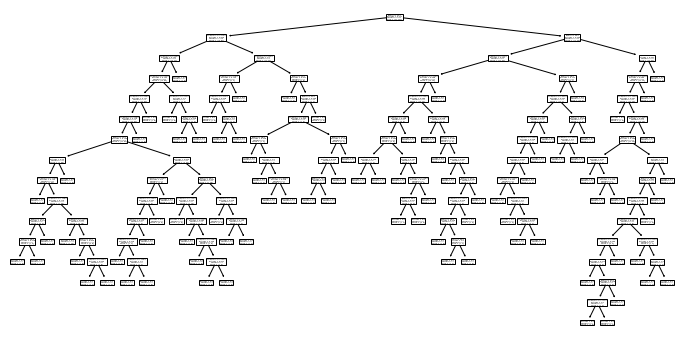

In [4]:
from sklearn import tree

arbol_decision = tree.DecisionTreeClassifier(criterion="entropy")

arbol = arbol_decision.fit(datos_entrena, clase_entrena)

accuracy = arbol_decision.score(datos_prueba, clase_prueba)

print(accuracy)

print(tree.export_text(arbol,
                      feature_names=["Edad", "Colesterol"]))
plt.figure(figsize=(12, 6))
tree.plot_tree(arbol, 
              feature_names=["Edad", "Colesterol"])
#plt.show()


<BR><BR>

# Clasifica a nuevos pacientes

In [5]:
print("Nuevo paciente", arbol_decision.predict([[70, 150]]))

Nuevo paciente [0]


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


<BR><BR><BR><BR><BR><BR><BR><BR><BR><BR><BR><BR><BR><BR><BR><BR><BR><BR><BR><BR><BR><BR><BR><BR><BR>